In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import itertools as itr

%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [3]:
X = df[['Ground Temperature']]
y = df['Chirps/Second']

In [4]:
linreg = LinearRegression().fit(X, y)

/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


##### 1. Find the linear regression equation for this data.

In [5]:
print('Lin. Reg. Eq.: y = ', linreg.coef_[0],'x + ', linreg.intercept_)

Lin. Reg. Eq.: y =  0.202999731408 x +  0.459314645236


##### 2. Chart the original data and the equation on the chart.

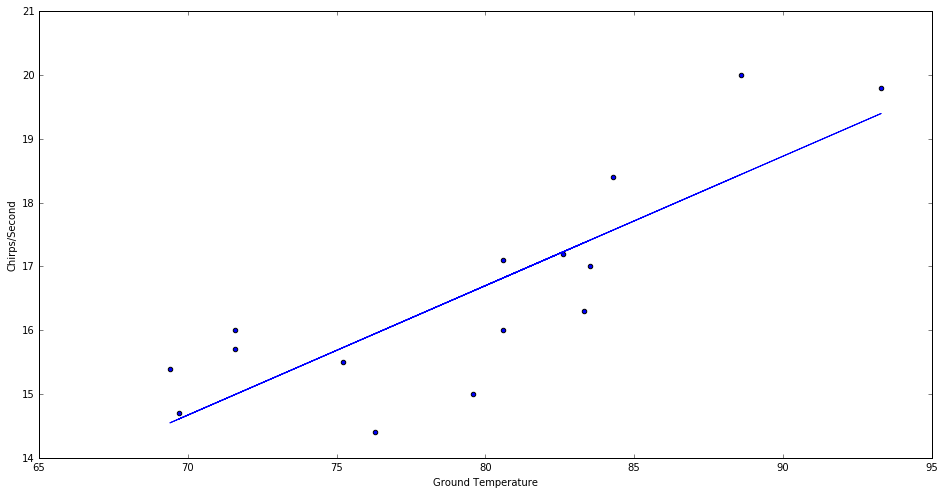

In [6]:
df.plot(kind='scatter', x='Ground Temperature', y='Chirps/Second', figsize=(16, 8))
plt.plot(X, linreg.predict(X))

##### 3. Find the equation's  R<sup>2</sup>  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [7]:
print('R-squared:', linreg.score(X, y))

R-squared: 0.692294652915


This is not a very strong correlation.

##### 4. Extrapolate data: If the ground temperature reached 95° F, then at what approximate rate would you expect the crickets to be chirping?

In [8]:
print('Prediction:', round(linreg.predict(95)[0], 1), "chirps per second")

Prediction: 19.7 chirps per second


##### 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [9]:
X = df[['Chirps/Second']]
y = df['Ground Temperature']
result = LinearRegression().fit(X,y).predict(18)
print('Prediction:', round(result[0], 1), "degrees")

Prediction: 84.2 degrees


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [10]:
df = pd.read_fwf("brain_body.txt")

##### 1. Find the linear regression equation for this data for brain weight to body weight.

In [11]:
X = df[['Brain']]
y = df['Body']
linreg = LinearRegression().fit(X, y)
print('Lin. Reg. Eq.: y = ', linreg.coef_[0],'x + ', linreg.intercept_)

Lin. Reg. Eq.: y =  0.966496367673 x +  91.0043962074


##### 2. Chart the original data and the equation on the chart.

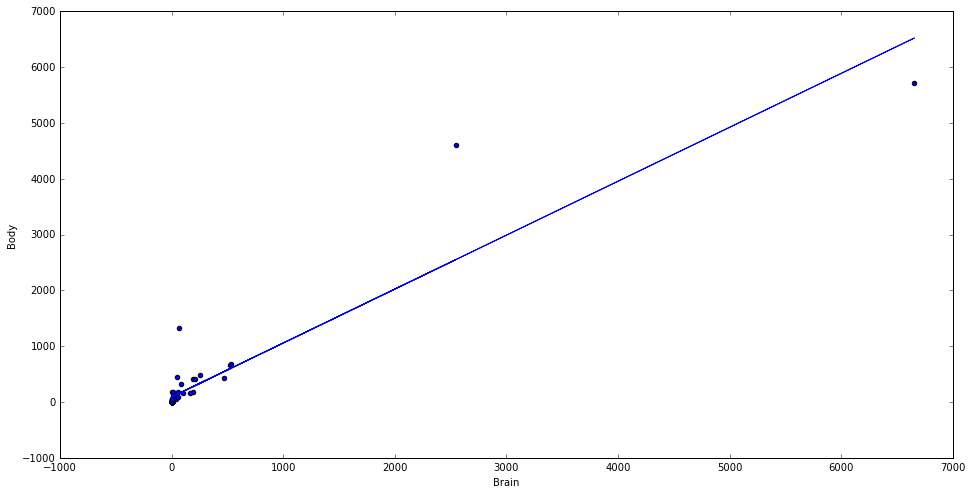

In [12]:
df.plot(kind='scatter', x='Brain', y='Body', figsize=(16, 8))
plt.plot(X, linreg.predict(X))

##### 3. Find the equation's  R<sup>2</sup> score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.) 

In [13]:
print('R-squared:', linreg.score(X, y))

R-squared: 0.872662084304


Not bad.

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

In [14]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

##### 1. Find the linear regression equation for this data using columns 1-5 to column 6.

In [15]:
feature_cols = ['Sex', 'Rank', 'Year', 'Degree','YSdeg']
X = df[feature_cols]
y = df.Salary
linreg = LinearRegression().fit(X, y)

In [16]:
print('Lin. Reg. Eq.: y = ', linreg.coef_ ,'X + ', linreg.intercept_)

Lin. Reg. Eq.: y =  [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354] X +  11410.1465473


#### 2. Find the selection of columns with the best  R<sup>2</sup>  score.

In [17]:
def all_combs(iter):
    combs = []
    for L in range(1, len(iter)+1):
        for subset in itr.combinations(iter, L):
            combs.append(list(subset))
    return combs

In [18]:
combs = all_combs(feature_cols)

In [19]:
combs

[['Sex'],
 ['Rank'],
 ['Year'],
 ['Degree'],
 ['YSdeg'],
 ['Sex', 'Rank'],
 ['Sex', 'Year'],
 ['Sex', 'Degree'],
 ['Sex', 'YSdeg'],
 ['Rank', 'Year'],
 ['Rank', 'Degree'],
 ['Rank', 'YSdeg'],
 ['Year', 'Degree'],
 ['Year', 'YSdeg'],
 ['Degree', 'YSdeg'],
 ['Sex', 'Rank', 'Year'],
 ['Sex', 'Rank', 'Degree'],
 ['Sex', 'Rank', 'YSdeg'],
 ['Sex', 'Year', 'Degree'],
 ['Sex', 'Year', 'YSdeg'],
 ['Sex', 'Degree', 'YSdeg'],
 ['Rank', 'Year', 'Degree'],
 ['Rank', 'Year', 'YSdeg'],
 ['Rank', 'Degree', 'YSdeg'],
 ['Year', 'Degree', 'YSdeg'],
 ['Sex', 'Rank', 'Year', 'Degree'],
 ['Sex', 'Rank', 'Year', 'YSdeg'],
 ['Sex', 'Rank', 'Degree', 'YSdeg'],
 ['Sex', 'Year', 'Degree', 'YSdeg'],
 ['Rank', 'Year', 'Degree', 'YSdeg'],
 ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]

In [20]:
max([(LinearRegression().fit(df[comb], df.Salary).score(df[comb], df.Salary), comb) for comb in combs])

(0.85471806744109713, ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'])

The highest R<sup>2</sup> value comes from the line of best fit determined by all five variables.

##### 3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

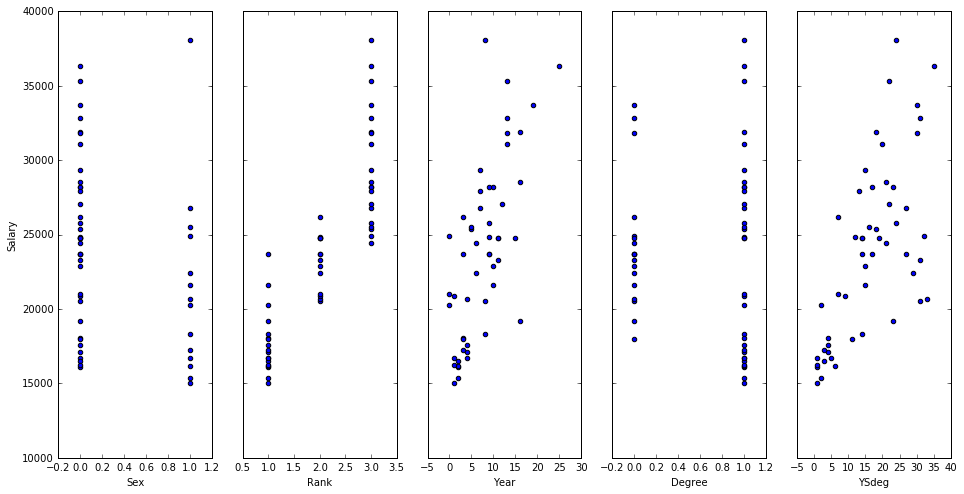

In [21]:
fig, axs = plt.subplots(1, 5, sharey=True)
df.plot(kind='scatter', x='Sex', y='Salary', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Rank', y='Salary', ax=axs[1])
df.plot(kind='scatter', x='Year', y='Salary', ax=axs[2])
df.plot(kind='scatter', x='Degree', y='Salary', ax=axs[3])
df.plot(kind='scatter', x='YSdeg', y='Salary', ax=axs[4])

Sex, Rank, and Degree graphs show us very little since those variables are nominal and therefore more or less boolean in nature. At first glance, though, it appears that there are more male data points than female and a quick visual inspection of those points' distributions suggests the median and mean male salary must be higher than that of the females. However rank and degree must be considered.  A difference in mean or median income could indicate salary discrimination **assuming each professor's field of expertise is also equally valuable**. Let's look deeper. 

First, let's clean up our original full dataframe, and perform analysis along the way.

In [22]:
df['Sex'] = df['Sex'].replace(0, 'Male')
df['Sex'] = df['Sex'].replace(1, 'Female')

In [23]:
df['Degree'] = df['Degree'].replace(0, 'Master\'s')
df['Degree'] = df['Degree'].replace(1, 'Doctorate')

In [24]:
df['Rank'] = df['Rank'].replace(1, 'Assistant')
df['Rank'] = df['Rank'].replace(2, 'Associate')
df['Rank'] = df['Rank'].replace(3, 'Full')

In [25]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,Male,Full,25,Doctorate,35,36350
1,Male,Full,13,Doctorate,22,35350
2,Male,Full,10,Doctorate,23,28200
3,Female,Full,7,Doctorate,27,26775
4,Male,Full,19,Master's,30,33696


In [26]:
df.Sex.value_counts()

Male      38
Female    14
Name: Sex, dtype: int64

###### We can see there are many more male data points than female data points.

In [27]:
df.groupby(by='Sex').Salary.mean()

Sex
Female    21357.142857
Male      24696.789474
Name: Salary, dtype: float64

In [28]:
df.groupby(by='Sex').Salary.median()

Sex
Female    20495
Male      24746
Name: Salary, dtype: int64

##### As previously presumed, the mean and median male salary is higher than the mean and median female salary

In [29]:
df.groupby(by='Sex').Rank.value_counts()

Sex     Rank     
Female  Assistant     8
        Full          4
        Associate     2
Male    Full         16
        Associate    12
        Assistant    10
Name: Rank, dtype: int64

###### We also see that males professors are proportionally in higher rank positions than their female counterparts.

In [30]:
df.groupby(by='Sex').Degree.value_counts()

Sex     Degree   
Female  Doctorate    10
        Master's      4
Male    Doctorate    24
        Master's     14
Name: Degree, dtype: int64

...but a larger propotion of female professors have doctorate degrees compared to their male counterparts...

This in and of itself is not proof of salary discrimination, since you can see from the graphs above that there is a good bit of overlap in the pay brackets between both rank and degree.

##### Let's compare the salaries of professors grouped by rank and degree, then by sex.

In [54]:
df.groupby(by=['Rank','Degree','Sex']).Salary.mean()

Rank       Degree     Sex   
Assistant  Doctorate  Female    17005.714286
                      Male      16901.142857
           Master's   Female    21600.000000
                      Male      20296.000000
Associate  Doctorate  Male      23246.200000
           Master's   Female    21570.000000
                      Male      23584.571429
Full       Doctorate  Female    30106.666667
                      Male      29592.750000
           Master's   Female    24900.000000
                      Male      30711.500000
Name: Salary, dtype: float64

In [55]:
df.groupby(by=['Rank','Degree','Sex']).Salary.median()

Rank       Degree     Sex   
Assistant  Doctorate  Female    16686
                      Male      16700
           Master's   Female    21600
                      Male      19175
Associate  Doctorate  Male      24750
           Master's   Female    21570
                      Male      23712
Full       Doctorate  Female    26775
                      Male      28358
           Master's   Female    24900
                      Male      32350
Name: Salary, dtype: int64

The findings here are somewhat conflicting.  In some cases, like with assistant professors, there is little difference between the mean and median salaries with respect to gender.  In fact, women's salaries are slightly higher.  For associate professors with master's degrees, men seem to make \$2,000 more a year than women.  In full professorships, women with doctorate degrees on average make just as much as men, though the median income is higher for men.  The most blatant different is among full professors with master's degrees, where it seems that men make at least \$5,000 more than women with the same basic qualifications.

So... is sex a factor in salary?  It appears there is a wage gap that grows as we look higher in rank.

However, there are a few things to consider about this data set before citing this as proof of social injustice:

1. This is a very small data set.
2. There is no metric for each professor's field of study.  It would be naive to assume that all fields of study are equally valuable, and so we cannot rightly claim that gender is the only possible explanation for the salary gap that we see.

Considering my second point, it would perhaps be a better approach to find mean and median salaries for certain fields of study, and then find the distribution of gender within those fields of study.  From there, it could be determined if women were underrepresented in higher paying fields, and then address the causes of that.